# 📖 Introduction to Logistic Regression

**Logistic Regression** is a classification model used to predict **a binary outcome** (0 or 1).  
Unlike **Linear Regression**, which predicts a continuous value, it applies a **sigmoid function** to obtain a **probability**.

### 🔍 Difference between Linear and Logistic Regression:
| **Linear Regression** | **Logistic Regression** |
|----------------------|----------------------|
| Predicts a continuous value | Predicts a probability (0 to 1) |
| Uses identity function $f(x) = x$ | Uses the sigmoid function $f(x) = \frac{1}{1 + e^{-x}}$ |
| Measures error with MSE | Uses Log-Loss (Cross-Entropy) |

---

## 🧮 Mathematics Behind Logistic Regression

### 🔹 1. Sigmoid Function  
The **sigmoid function** transforms a linear output into a **probability**:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

where $z = X\beta$ (dot product of features and coefficients).

---

### 🔹 2. Cost Function (Log Loss)  
Instead of MSE, Logistic Regression uses the **log-loss function**:

$$
J(\beta) = - \frac{1}{m} \sum_{i=1}^{m} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
$$

This **penalizes incorrect predictions** that are close to 0 or 1.

---

### 🔹 3. Optimization with Gradient Descent  
To minimize the log-loss, we update **$\beta$** using Gradient Descent:

$$
\beta := \beta - \alpha \frac{\partial J}{\partial \beta}
$$

---


In [3]:
## 📦 Importing Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

## 📂 Loading and Exploring the Dataset

For this notebook, we will use the **Breast Cancer dataset**, a common dataset used for binary classification.  
It contains **features extracted from cell nuclei** and a **binary target variable** (0 = Malignant, 1 = Benign).


In [4]:
# Load dataset (Breast Cancer)
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["Target"] = data.target  # 0 = Malignant, 1 = Benign

# Display first five rows
display(df)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


## 🔍 Checking for Missing Values

Before training our model, we need to ensure that there are **no missing values** in our dataset.


In [5]:
# Check for missing values
print("🔍 Missing values per column:\n", df.isnull().sum())


🔍 Missing values per column:
 mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
Target                     0
dtype: int64


## 📊 Feature Scaling and Splitting the Data

To improve model performance:
1. We **normalize the features** using `StandardScaler()`.
2. We **split the dataset** into **training (80%) and test (20%)** sets.


In [11]:
# Separate features and target
X = df.drop(columns=["Target"])
y = df["Target"]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"✅ Data prepared: Train = {X_train.shape}, Test = {X_test.shape}")


✅ Data prepared: Train = (455, 30), Test = (114, 30)


## 🤖 Training the Logistic Regression Model

We now **train our Logistic Regression model** on the training set and evaluate its performance.

---

### 📊 Evaluation Metrics for Classification

Since Logistic Regression is a **classification model**, we evaluate its performance using the following key metrics:

### 🔹 1. Accuracy  
Measures the proportion of **correct predictions** over all predictions:

$$
\text{Accuracy} = \frac{\text{True Positives} + \text{True Negatives}}{\text{Total Samples}}
$$

✅ Good when **classes are balanced**.  
⚠ Can be **misleading for imbalanced datasets**.

---

### 🔹 2. Precision  
Measures the proportion of **true positive predictions** among all predicted positives:

$$
\text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}
$$

✅ Useful when **False Positives are costly** (e.g., spam detection).  

---

### 🔹 3. Recall (Sensitivity)  
Measures the proportion of **correctly identified positives** among all actual positives:

$$
\text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
$$

✅ Useful when **False Negatives are costly** (e.g., cancer detection).  

---

### 🔹 4. F1-Score  
Harmonic mean of Precision and Recall, balancing both metrics:

$$
F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$

✅ Ideal when we need a **tradeoff** between Precision and Recall.  

---

### 🔹 5. Confusion Matrix  
A matrix that **summarizes predictions vs. actual classes**:

|  | Predicted Positive | Predicted Negative |
|--|------------------|------------------|
| **Actual Positive** | True Positives (TP) | False Negatives (FN) |
| **Actual Negative** | False Positives (FP) | True Negatives (TN) |

- **False Positives (FP)**: Incorrectly classified as positive.  
- **False Negatives (FN)**: Incorrectly classified as negative.  

---

### 🔹 6. ROC Curve & AUC Score  
The **Receiver Operating Characteristic (ROC) curve** shows the tradeoff between **True Positive Rate (TPR) and False Positive Rate (FPR)**:

- **True Positive Rate (TPR) = Recall**:

$$
TPR = \frac{TP}{TP + FN}
$$

- **False Positive Rate (FPR)**:

$$
FPR = \frac{FP}{FP + TN}
$$

- **AUC (Area Under Curve)**: Measures the overall ability of the model to distinguish between classes.

✅ AUC **closer to 1** → Better model performance.  

---


In [13]:
# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation results
print(f"📊 Model Performance:")
print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1-Score  : {f1:.4f}")

📊 Model Performance:
Accuracy  : 0.9737
Precision : 0.9722
Recall    : 0.9859
F1-Score  : 0.9790


📊 AUC-ROC Score: 0.9974


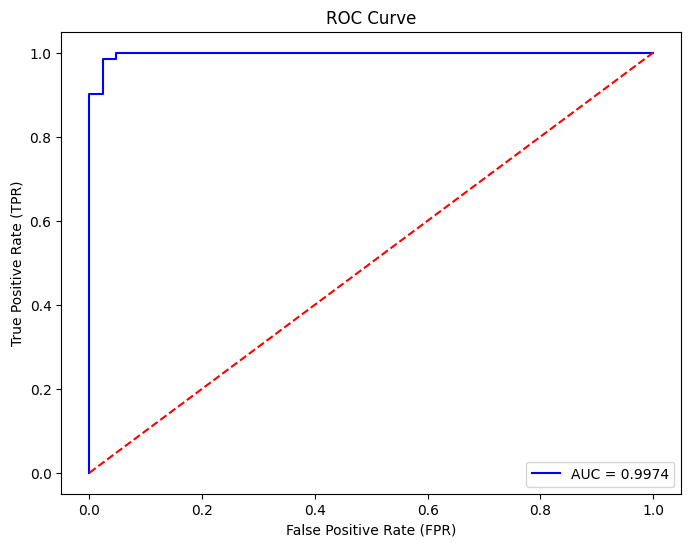

In [17]:
# Compute predicted probabilities instead of class labels
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of class 1

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

# Compute AUC score
auc_score = auc(fpr, tpr)

print(f"📊 AUC-ROC Score: {auc_score:.4f}")

# Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f"AUC = {auc_score:.4f}")
plt.plot([0,1], [0,1], 'r--')  # Diagonal line (random classifier)
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend()
plt.show()


## 📉 Visualizing the Confusion Matrix

The **confusion matrix** helps understand how well the model differentiates between classes.


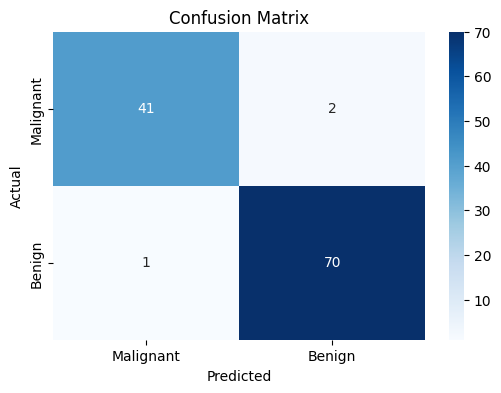

In [19]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Malignant", "Benign"], yticklabels=["Malignant", "Benign"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## 🔹 Regularization: Ridge (L2) and Lasso (L1)

To **prevent overfitting**, we apply **regularization techniques** that add a **penalty term** to the cost function, discouraging large coefficients.

### 🔹 Why Regularization?  
- **High variance models** tend to overfit training data.
- **Regularization constrains the magnitude of coefficients**, making the model **simpler and more generalizable**.
- Helps when **features are highly correlated (multicollinearity)**.

---

### 📖 1. L2 Regularization (Ridge Regression)  
Ridge Regression **adds an L2 penalty** to the cost function:

$$
J(\beta) = - \frac{1}{m} \sum_{i=1}^{m} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right] + \lambda \sum_{j=1}^{p} \beta_j^2
$$

- **Effect:** Shrinks coefficients **towards zero** but **does not remove them**.
- **Helps when features are correlated** by distributing weights.
- **Large $\lambda$ → Stronger penalty** → More shrinkage.

✅ **Good for high-dimensional data where all features might be relevant.**  

---

### 📖 2. L1 Regularization (Lasso Regression)  
Lasso Regression **adds an L1 penalty**, which **can force some coefficients to exactly zero**:

$$
J(\beta) = - \frac{1}{m} \sum_{i=1}^{m} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right] + \lambda \sum_{j=1}^{p} |\beta_j|
$$

- **Effect:** Shrinks some coefficients to zero, effectively performing **feature selection**.
- **Encourages sparsity**, making the model easier to interpret.
- **Larger $\lambda$ → More features set to zero**.

✅ **Useful when we suspect that only a few features are important.**

---

### 🔹 Comparison of Ridge and Lasso

| **Method**  | **Penalty Term** | **Effect on Coefficients** | **Feature Selection?** | **Best Use Case** |
|------------|---------------|--------------------|-----------------|----------------|
| **Ridge (L2)** | $ \lambda \sum \beta_j^2$ | Shrinks coefficients but keeps all | ❌ No | When features are correlated |
| **Lasso (L1)** | $ \lambda \sum \beta_j $ | Shrinks and removes some coefficients | ✅ Yes | When only a few features matter |

---



In [16]:
# Initialize models with regularization
model_ridge = LogisticRegression(penalty="l2", C=1.0)  # Ridge
model_lasso = LogisticRegression(penalty="l1", solver="liblinear", C=1.0)  # Lasso

# Train models
model_ridge.fit(X_train, y_train)
model_lasso.fit(X_train, y_train)

print(f"✅ Ridge and Lasso models trained successfully")


✅ Ridge and Lasso models trained successfully


## 💡 Interview Questions

1️⃣ **What is the difference between Logistic and Linear Regression?**  
   - Linear Regression predicts **continuous values**, while Logistic Regression predicts **probabilities**.  

2️⃣ **Why does Logistic Regression use Log-Loss instead of MSE?**  
   - Log-Loss **penalizes wrong predictions more effectively**, especially for values close to 0 or 1.  

3️⃣ **How do you interpret the coefficients in Logistic Regression?**  
   - A coefficient **$\beta_i$** represents the **log-odds ratio** of $x_i$ on the target.  

4️⃣ **Why do we need regularization in Logistic Regression?**  
   - To **prevent overfitting** and handle **multicollinearity**.  

5️⃣ **How do you handle an imbalanced dataset in Logistic Regression?**  
   - Use **class weights**, **oversampling/undersampling**, or **SMOTE** techniques.  

---
